# Problem 3: Modelling the Spread of Disease
### Jakub Dawidowicz

## Tasks 1 and 2: Implement the code and indicate the structure

Code implemented into python below with structure indicated with comments

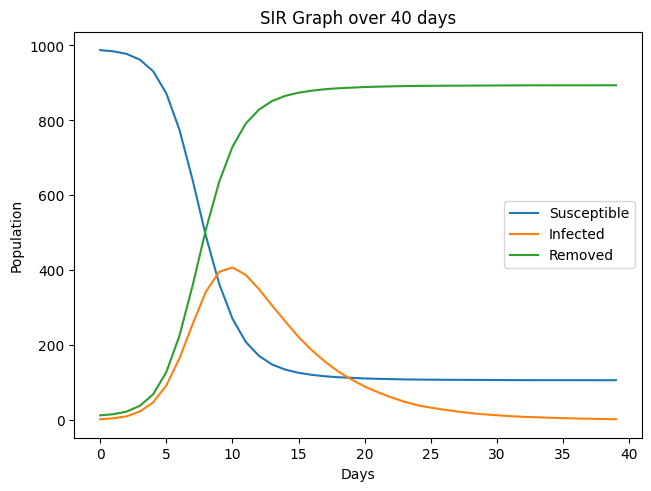

In [32]:
import numpy as np
import matplotlib.pyplot as plt

## Initialisation

students = 1000
days = 40
immune = 0.01
recoveryrate = 0.2 #per infected per day
infectrate = 1 #per day


def SIR(students, days, infectrate, recoveryrate, immune):
    ## P[x] -> x: 1 = susceptible, 0 = immunised, 2 = infected
    reps = 40
    tot_removed = []
    tot_infected = []
    tot_sus = []
    mod = infectrate % 1
    
    ## Random Student
    def rs(): 
       return int(round(np.random.rand() * (students-1), 0))
   
    for i in range(days):
      tot_removed.append(0)
      tot_infected.append(0)
      tot_sus.append(0)

    # Repetition loop
    for rep in range(reps):
        P = []

        ## Lists for total students each day
        

        # Create Initial Conditions
        ## Make all susceptible
        for i in range(students):
            P.append(1)

        ## Create immune students
        num_immune = round(immune * students)
        n = 0
        while n < num_immune:
            ra = rs()
            if P[ra] != 0:
                P[ra] = 0
                n += 1
        
        ## Create 1 infected
        n = 0
        while n < 1:
            ra = rs()
            if P[ra] == 1:
                P[ra] = 2
                n += 1

        # Begin Main Loop
        ## Loop each day
        for day in range(days):
            ## Loop each student
            for student in range(students):

                ## If infected
                if P[student] == 2:
                    f = 0 - mod
                    while f < infectrate:
                        ra = rs()
                        if P[ra] == 1:
                            P[ra] = 2
                        f+=1
                        
                    ## Extra chance for non-integer infect rates
                    if np.random.rand() < mod:
                        ra = rs()
                        if P[ra] == 1:
                            P[ra] = 2
                        f = f + mod +0.00001
                
                ## Recovery
                if np.random.rand() < recoveryrate:
                    ra = rs()
                    if P[ra] == 2:
                        P[ra] = 0
            
            ## Count total at end of day
            for student in range(students):
                if P[student] == 2:
                    tot_infected[day] += 1
                    tot_removed[day] += 1
                if P[student] == 1:
                    tot_sus[day] += 1
                if P[student] == 0:
                    tot_removed[day] += 1
        # End main loop
          
    ## Find average for each day, return averages
    for day in range(days):
        tot_infected[day] = tot_infected[day] / reps
        tot_sus[day] = tot_sus[day] / reps
        tot_removed[day] = tot_removed[day] / reps
        
    return tot_infected, tot_sus, tot_removed
        




## Plotting Function
def plot_sir(students,days,infectrate,recoveryrate,immune) :
    i , s, r = SIR(students, days,infectrate,recoveryrate,immune)
    plt.xlabel('Days')
    plt.ylabel('Population')
    plt.plot(range(days),s, label = 'Susceptible')
    plt.plot(range(days),i, label = 'Infected')
    plt.plot(range(days),r, label = 'Removed')
    plt.show

plt.title('SIR Graph over 40 days')
plot_sir(students,days, infectrate, recoveryrate, immune)
plt.legend()



## Is there anything wrong with the implementation?
I am not sure if there is something strictly wrong, the graph for the model looks as expected, however it could do with some improvements. The pseudo code only works for an integer infection rate of 1, however this has been amended in the code above. It also does not take into account factors such as medicine, or if susceptibility can return after infection after some days.

## Task 3: Repeat the calculation with different fractions of immunized students, reduced and increased recovery

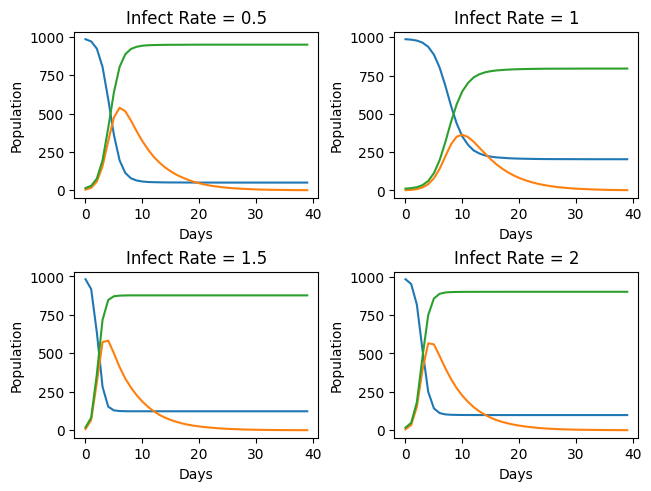

In [33]:
infectrate = [0.5,1,1.5,2]
figs = [1,2,3,4]
plt.rcParams['figure.constrained_layout.use'] = True
for fig in figs:
    plt.subplot(2,2,fig)
    plt.title(f'Infect Rate = {infectrate[fig-1]}')
    plot_sir(students, days, infectrate[fig-1], recoveryrate, immune)

Infection rate is behaving as expected, with higher rates of infection the spread is much more rapid, the infection peaks quicker and higher. This also means the recovery is faster, so the epidemic does not last as long, and majority of the population is removed after just a few days.

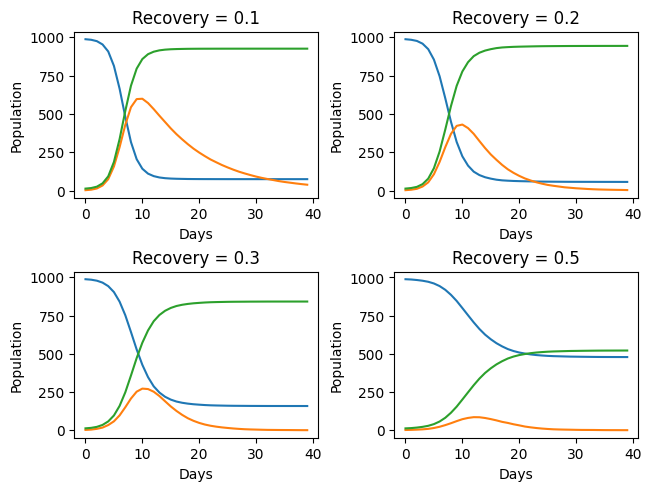

In [34]:
recoveryrate = [0.1,0.2,0.3,0.5]
infectrate = 1
for fig in figs:
    plt.subplot(2,2,fig)
    plt.title(f'Recovery = {recoveryrate[fig-1]}')
    plot_sir(students, days, infectrate , recoveryrate[fig-1], immune)

As expected the recovery rate slows down the infection. As recovery rate increases, the epidemic peak is lower annd happens slower, and also decays faster. This leaves a larger of the amount of the population overall unaffected by the disease.

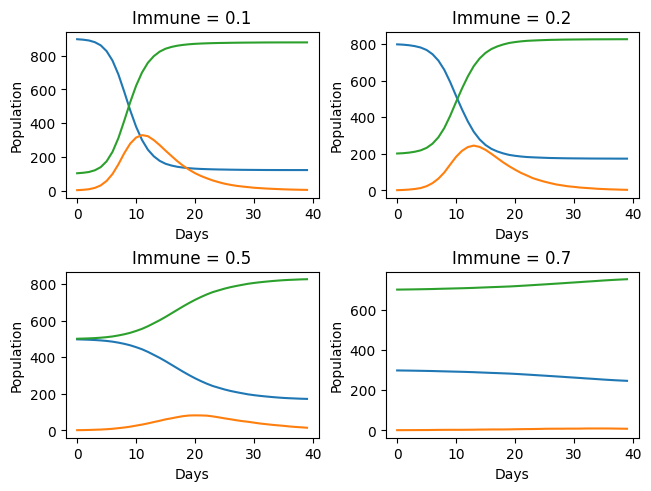

In [35]:
immune = [0.1,0.2,0.5,0.7]
infectrate = 1
recoveryrate = 0.2
for fig in figs:
    plt.subplot(2,2,fig)
    plt.title(f'Immune = {immune[fig-1]}')
    plot_sir(students, days, infectrate , recoveryrate, immune[fig-1])

Lastly, changing the initial immunity also behaves as expected. The initial propagation takes longer as there is less susceptible,  and also peaks lower because of this. We can see that at 70% immunity, the effects of the disease are barely noticeable.

## Task 4: Modelling influenza

Amending the SIR function so that after recovery, a student returns to state 1 (susceptible)

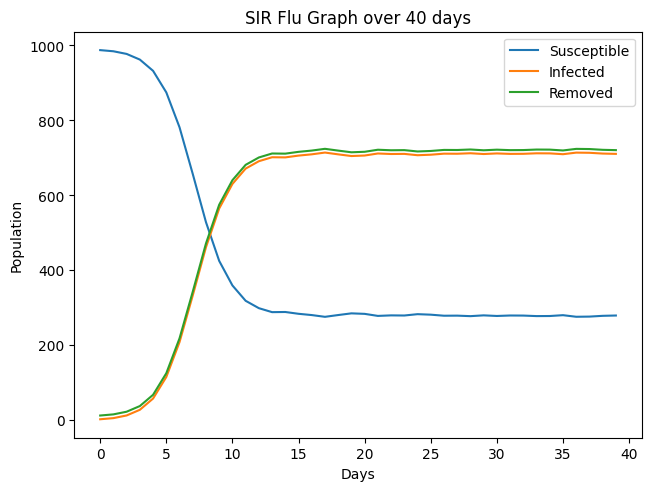

In [36]:
immune = 0.01

def SIR_flu(students, days, infectrate, recoveryrate, immune):
    ## P[x] -> x: 1 = susceptible, 0 = immunised, 2 = infected
    reps = 40
    tot_removed = []
    tot_infected = []
    tot_sus = []
    mod = infectrate % 1
    
    ## Random Student
    def rs(): 
       return int(round(np.random.rand() * (students-1), 0))
   
    for i in range(days):
      tot_removed.append(0)
      tot_infected.append(0)
      tot_sus.append(0)

    # Repetition loop
    for rep in range(reps):
        P = []

        ## Lists for total students each day
        

        # Create Initial Conditions
        ## Make all susceptible
        for i in range(students):
            P.append(1)

        ## Create immune students
        num_immune = round(immune * students)
        n = 0
        while n < num_immune:
            ra = rs()
            if P[ra] != 0:
                P[ra] = 0
                n += 1
        
        ## Create 1 infected
        n = 0
        while n < 1:
            ra = rs()
            if P[ra] == 1:
                P[ra] = 2
                n += 1

        # Begin Main Loop
        ## Loop each day
        for day in range(days):
            ## Loop each student
            for student in range(students):

                ## If infected
                if P[student] == 2:
                    f = 0 - mod
                    while f < infectrate:
                        ra = rs()
                        if P[ra] == 1:
                            P[ra] = 2
                        f+=1
                        
                    ## Extra chance for non-integer infect rates
                    if np.random.rand() < mod:
                        ra = rs()
                        if P[ra] == 1:
                            P[ra] = 2
                        f = f + mod +0.00001
                
                ## Recovery
                if np.random.rand() < recoveryrate:
                    ra = rs()
                    if P[ra] == 2:
                        P[ra] = 1
            
            ## Count total at end of day
            for student in range(students):
                if P[student] == 2:
                    tot_infected[day] += 1
                    tot_removed[day] += 1
                if P[student] == 1:
                    tot_sus[day] += 1
                if P[student] == 0:
                    tot_removed[day] += 1
        # End main loop
          
    ## Find average for each day, return averages
    for day in range(days):
        tot_infected[day] = tot_infected[day] / reps
        tot_sus[day] = tot_sus[day] / reps
        tot_removed[day] = tot_removed[day] / reps
        
    return tot_infected, tot_sus, tot_removed

## Plotting Function
def plot_sir_flu(students,days,infectrate,recoveryrate,immune) :
    i , s, r = SIR_flu(students, days,infectrate,recoveryrate,immune)
    plt.xlabel('Days')
    plt.ylabel('Population')
    plt.plot(range(days),s, label = 'Susceptible')
    plt.plot(range(days),i, label = 'Infected')
    plt.plot(range(days),r, label = 'Removed')
    plt.show

plt.title('SIR Flu Graph over 40 days')
plot_sir_flu(students,days, infectrate, recoveryrate, immune)
plt.legend()

Without immunity, the epidemic hits a peak rate and stays there indefinitely, where the rate of recovery equals the rate of recovery. It is easy to see how dangerous this situation could be.